In [10]:
import os
import sys
%load_ext autoreload
#Now, you can turn on auto-reloading
%autoreload 2
#from google.colab import drive
#drive.mount('/content/drive')
path = 'c:/Users/emili/Documents/complex-frogs/cs3220_A4/cs3220_A4_src' #@param {type: "string"}
sys.path.append(path)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


1. Generate a random maze with size (7,7), as a Numpy matrix, which includes 25% of occupied cells (walls).

In [11]:
import numpy as np 
import math
import random
size = (7,7)
mazeRand = np.random.choice([0,1], size=size, p=[0.25, 0.75]) #0 = wall

#fixed test maze just incase 
mazeTest = [[1, 0, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1],
            [1, 0, 1, 1, 1, 0, 0],
            [1, 0, 1, 1, 1, 0, 1],
            [1, 0, 0, 1, 0, 1, 1],
            [0, 0, 0, 1, 1, 1, 1]]

mazeRand

array([[1, 1, 1, 0, 0, 1, 0],
       [1, 1, 1, 1, 1, 0, 1],
       [0, 0, 1, 0, 1, 1, 1],
       [1, 1, 0, 0, 0, 1, 1],
       [1, 1, 1, 1, 1, 1, 0],
       [1, 0, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1]])

2. Build the maze state space

[[1 1 1 0 0 1 0]
 [1 1 1 1 1 0 1]
 [0 0 1 0 1 1 1]
 [1 1 0 0 0 1 1]
 [1 1 1 1 1 1 0]
 [1 0 1 0 1 1 1]
 [0 1 1 1 1 1 1]]


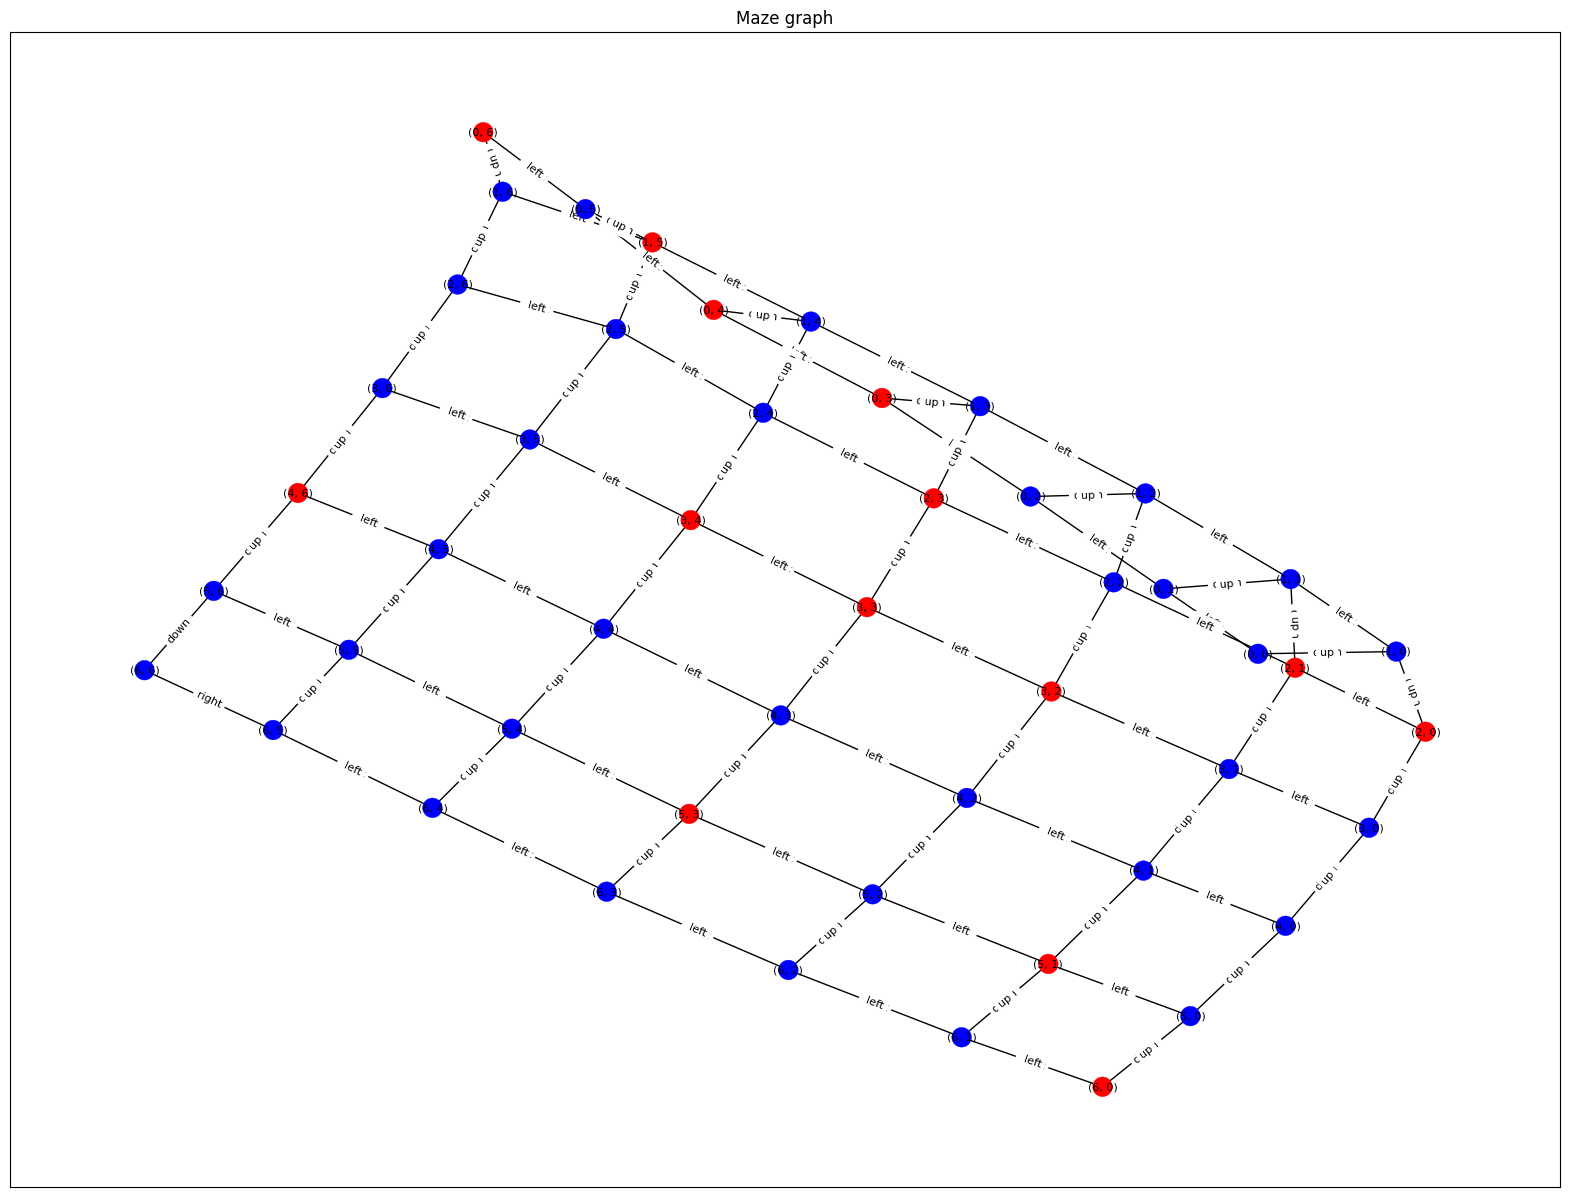

In [12]:
from mazeData import *
from mazeGraphClass import mazeGraph
from visualizations import simple_visualization

mazeActs=defineMazeActions(mazeRand)
maze=makeMazeTransformationModel(mazeActs)
res=mazeStatesLocations(7)
mazeWorldGraph=mazeGraph(maze, mazeStatesLocations(7))
simple_visualization(mazeWorldGraph, mazeRand)

[[1 1 1 0 0 1 0]
 [1 1 1 1 1 0 1]
 [0 0 1 0 1 1 1]
 [1 1 0 0 0 1 1]
 [1 1 1 1 1 1 0]
 [1 0 1 0 1 1 1]
 [0 1 1 1 1 1 1]]
34
[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 6), (2, 2), (2, 4), (2, 5), (2, 6), (3, 0), (3, 1), (3, 5), (3, 6), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (5, 0), (5, 2), (5, 4), (5, 5), (5, 6), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6)]
82 34


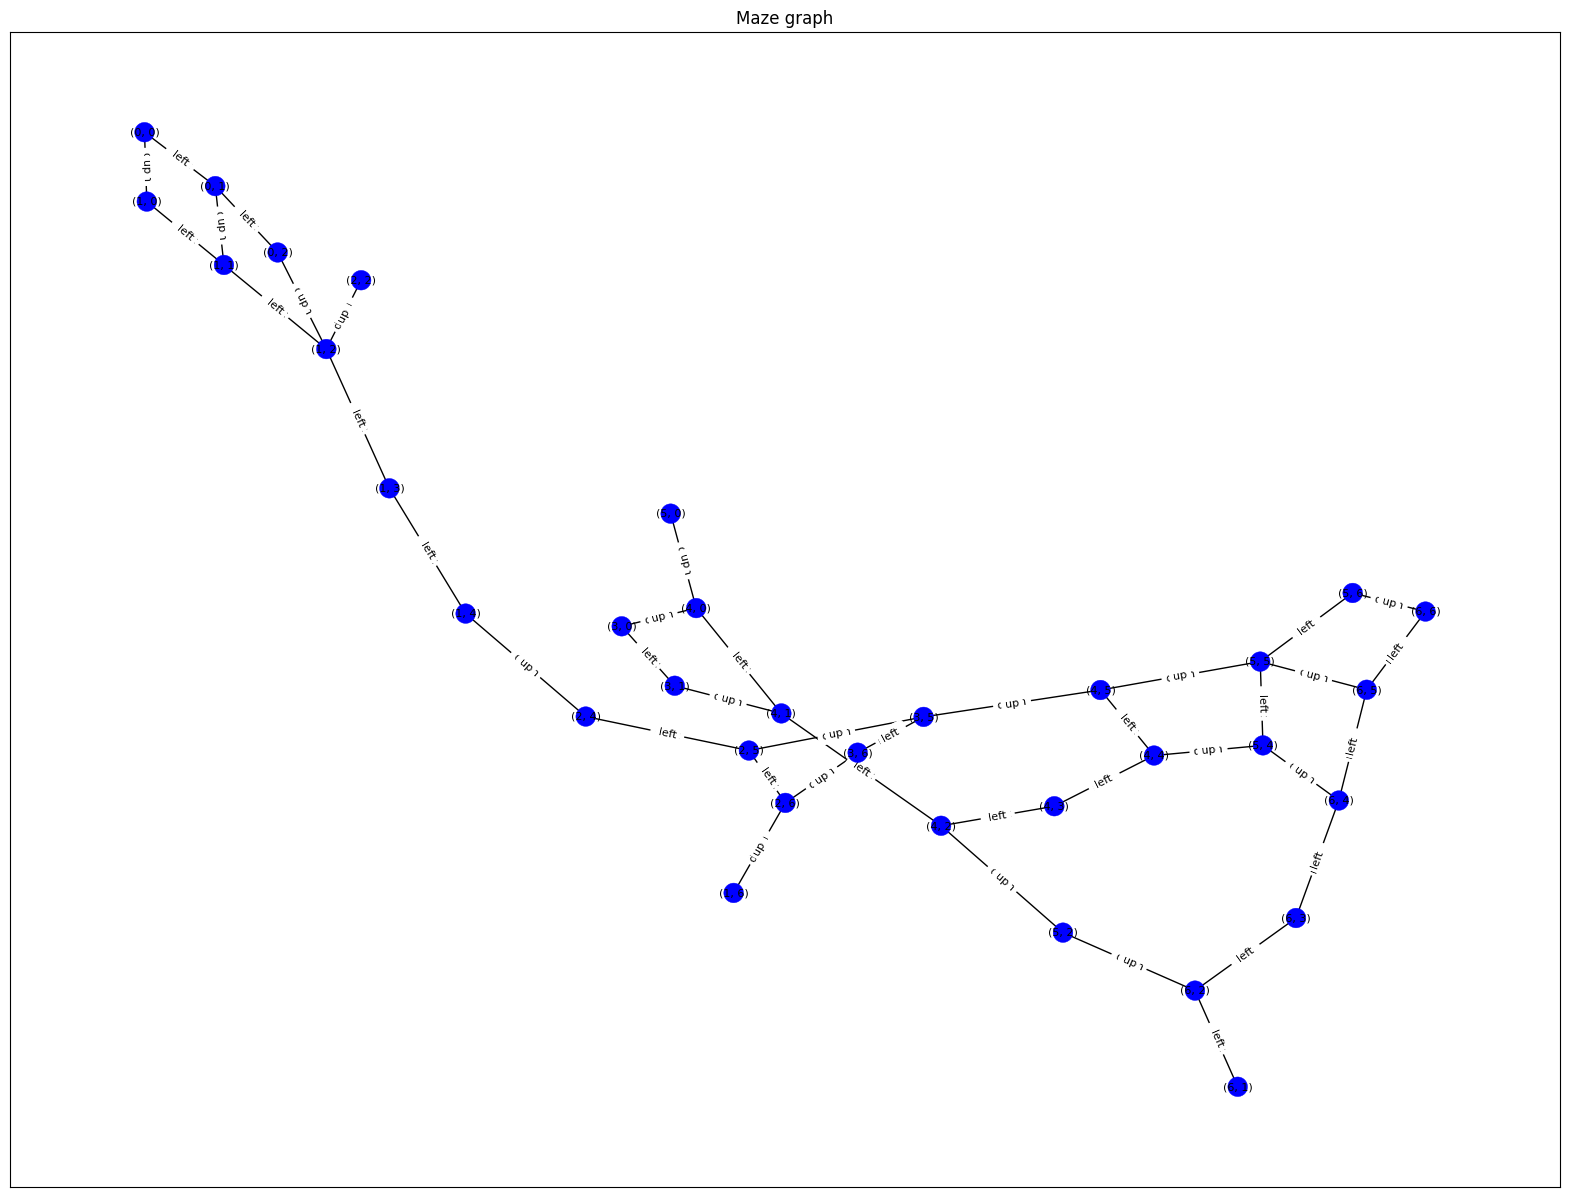

In [13]:
from visualizations import simple_visualization1
mazeAvailableActs=defineMazeAvailableActions(mazeRand)
maze1=makeMazeTransformationModel(mazeAvailableActs)
mazeWorldGraph1=mazeGraph(maze1, mazeStatesLocations(7))
simple_visualization1(mazeWorldGraph1, mazeRand)

3. Develop transition model where:
- The Rat-Agent is allowed to move only on free cells by using the following actions: *left, up, right, down*.
- Since the Maze is 7-story building different actions have different costs: left/right: -2 (from Agent's performance); down:-1; up:-4.

In [20]:
def mazeTransitionModel(stateSpace):
  transModel = {}
  for x in stateSpace.keys():
    for (action, y) in stateSpace[x].items():
      if action == 'left' or action == 'right':
        transModel.setdefault(x, {})[y] = 2
      elif action == 'up':
        transModel.setdefault(x, {})[y] = 4
      elif action == 'down':
        transModel.setdefault(x, {})[y] = 1
  return transModel
    
tModel = mazeTransitionModel(maze1)
tModel

{(0, 0): {(0, 1): 2, (1, 0): 1},
 (0, 1): {(0, 0): 2, (0, 2): 2, (1, 1): 1},
 (0, 2): {(0, 1): 2, (1, 2): 1},
 (1, 0): {(0, 0): 4, (1, 1): 2},
 (1, 1): {(1, 0): 2, (0, 1): 4, (1, 2): 2},
 (1, 2): {(1, 1): 2, (0, 2): 4, (1, 3): 2, (2, 2): 1},
 (1, 3): {(1, 2): 2, (1, 4): 2},
 (1, 4): {(1, 3): 2, (2, 4): 1},
 (1, 6): {(2, 6): 1},
 (2, 2): {(1, 2): 4},
 (2, 4): {(1, 4): 4, (2, 5): 2},
 (2, 5): {(2, 4): 2, (2, 6): 2, (3, 5): 1},
 (2, 6): {(2, 5): 2, (1, 6): 4, (3, 6): 1},
 (3, 0): {(3, 1): 2, (4, 0): 1},
 (3, 1): {(3, 0): 2, (4, 1): 1},
 (3, 5): {(2, 5): 4, (3, 6): 2, (4, 5): 1},
 (3, 6): {(3, 5): 2, (2, 6): 4},
 (4, 0): {(3, 0): 4, (4, 1): 2, (5, 0): 1},
 (4, 1): {(4, 0): 2, (3, 1): 4, (4, 2): 2},
 (4, 2): {(4, 1): 2, (4, 3): 2, (5, 2): 1},
 (4, 3): {(4, 2): 2, (4, 4): 2},
 (4, 4): {(4, 3): 2, (4, 5): 2, (5, 4): 1},
 (4, 5): {(4, 4): 2, (3, 5): 4, (5, 5): 1},
 (5, 0): {(4, 0): 4},
 (5, 2): {(4, 2): 4, (6, 2): 1},
 (5, 4): {(4, 4): 4, (5, 5): 2, (6, 4): 1},
 (5, 5): {(5, 4): 2, (4, 5): 4, 

4. Implement 2 Rat-Agents (based on Uniform-cost  and BreadthFirst Search algoritms) and apply them (separately) to find out which one is more productive for getting cheese (which Agent spends less peformance to get cheese).
* for Uniform-cost Search apply BEST-FIRST-SEARCH
with PATH-COST as the evaluation function
* PATH-COST is the total cost of the path from the initial state to the node if actions costs are: left/right: 2 (if the action 'left'/'right' is applied to get the child-node from parent-node);down:1; up:4.

In [ ]:
from mazeProblemClass import MazeProblem
from mazeProblemSolvingAgentClass import MazeProblemSolvingAgent

initState = (0,0)
goalState = (6,6)

ma1=MazeProblemSolvingAgent(initState,mazeWorldGraph1,goalState)
mp1=MazeProblem(initState,goalState,mazeWorldGraph1)
